### Steps
#### 1- Import necessary libraries
#### 2- Read the dataset using Pandas
#### 3- Explore the dataset properties
#### 4- Visualize the relationship between different variables and draw insights
Min, Max, Percentage, Mean


Correlation

Scatter, Plot

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import math

In [22]:
#Read the dataset
uber_df= pd.read_csv("data/uber1.csv")
#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [23]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [24]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [15]:
#Find the shape of the dataset
uber_df.shape

(1028136, 7)

Text(0, 0.5, 'Density of rides')

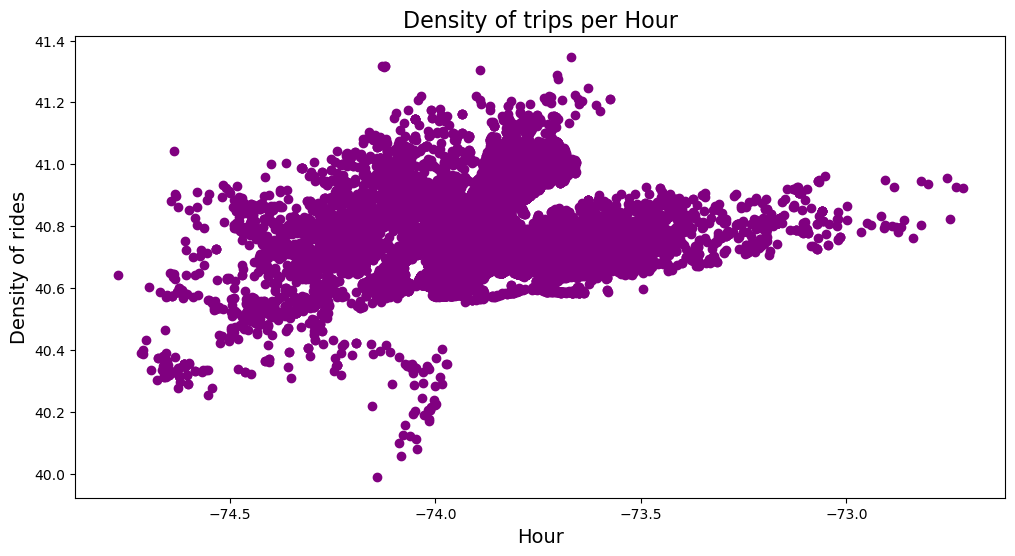

In [16]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

***Evaluation: The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.***

### My exploration

#### the quantity of rides according to regions

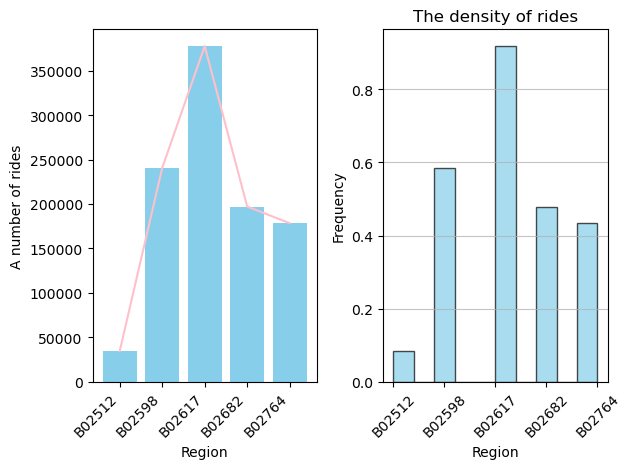

In [17]:
region_counts = Counter(uber_df['Base'])
regions = list(region_counts.keys())
counts = list(region_counts.values())
plt.subplot(1, 2, 1)
plt.bar(regions, counts, color='skyblue')
plt.plot(regions, counts, color='pink')
plt.xlabel('Region')
plt.ylabel('A number of rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
# histogram: the frequency of appearance of this kind of data
plt.hist(uber_df['Base'],color='skyblue',edgecolor='black',density=True,alpha=0.7)
plt.title("The density of rides")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.grid(axis='y',alpha=0.75)
plt.show()

In [10]:
a = uber_df.groupby('Base')['Base'].count()
print(a)

Base
B02512     34370
B02598    240600
B02617    377695
B02682    197138
B02764    178333
Name: Base, dtype: int64


In [ ]:
a = uber_df.groupby(["Base", "Day"]).size().reset_index(name='Trips Per Day')
#print(a)
b = uber_df.groupby(["Base", "Day", "Hour"]).agg(
    Count=("Date/Time", "count")
).reset_index()
b.rename(columns={'Count': 'Trips Per Hour Of Day'}, inplace=True)
#print(b)
merged_df = pd.merge(a, b, on=['Base', 'Day'], how='inner')
merged_df["Proportion of Hour"] = merged_df["Trips Per Hour Of Day"] / merged_df["Trips Per Day"]
#print(merged_df)
aggregated_hour_df = merged_df.groupby(['Base', 'Day']).agg(
    max_trips_per_hour_of_day=('Trips Per Hour Of Day', 'max'),
    min_trips_per_hour_of_day=('Trips Per Hour Of Day', 'min'),
    mean_trips_per_hour_of_day=('Trips Per Hour Of Day', 'mean'),   
).reset_index()
aggregated_hour_df.rename(columns={
    'max_trips_per_hour_of_day': 'Trips Per Hour Of Day (Max)', 
    'min_trips_per_hour_of_day': 'Trips Per Hour Of Day (Min)', 
    'mean_trips_per_hour_of_day': 'Trips Per Hour Of Day (Mean)',
}, inplace=True)
print(aggregated_hour_df)
b02512_trips = aggregated_hour_df.loc[aggregated_hour_df['Base']=='B02512',['Base', 'Day', 'Trips Per Hour Of Day (Mean)']]
ax= b02512_trips.plot(x= "Day", y= "Trips Per Hour Of Day (Mean)", label= "b02512_trips", color="red")
b02764_trips = aggregated_hour_df.loc[aggregated_hour_df['Base']=='B02764',['Base', 'Day', 'Trips Per Hour Of Day (Mean)']]
b02764_trips.plot(x= "Day", y= "Trips Per Hour Of Day (Mean)", label= "b02764_trips", ax=ax, ylabel= "Trips Per Hour Of Day (Mean)", color="green")

***A scatter plot shows the relationship
between two numeric variables as individual points, without connecting lines by default.***

<Axes: xlabel='Hour', ylabel='Trips Per Hour Of Day'>

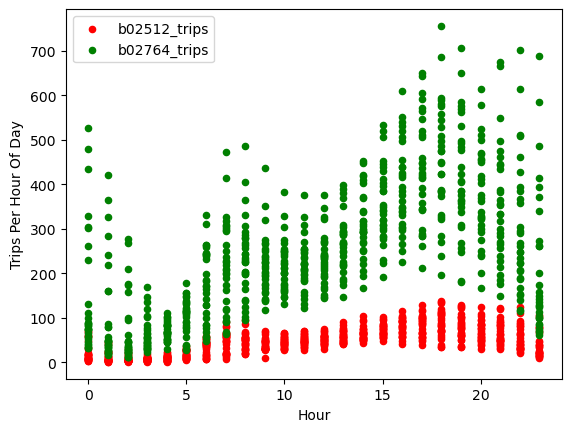

In [35]:
b = uber_df.groupby(['Base','Day','Hour']).agg(
    Count=('Date/Time', 'count')
).reset_index()
b.rename(columns={'Count': 'Trips Per Hour Of Day'}, inplace=True)
b02512_trips = b.loc[b['Base']=='B02512', ['Hour', 'Trips Per Hour Of Day']]
ax = b02512_trips.plot(kind='scatter', x='Hour', y='Trips Per Hour Of Day', label='b02512_trips', color='red')
b02764_trips = b.loc[b['Base']=='B02764', ['Hour', 'Trips Per Hour Of Day']]
b02764_trips.plot(kind='scatter', x='Hour', y='Trips Per Hour Of Day', label='b02764_trips', ax=ax, color='green')

In [129]:
print(uber_df.loc[uber_df['Base']=='B02512'])
b = uber_df.loc[(uber_df['Base']=='B02512') & (uber_df['Day']==1)]
print(b)

                Date/Time      Lat      Lon    Base  Day  Hour  Weekday  Month
0     2014-09-01 00:01:00  40.2201 -74.0021  B02512    1     0        0      9
1     2014-09-01 00:01:00  40.7500 -74.0027  B02512    1     0        0      9
2     2014-09-01 00:03:00  40.7559 -73.9864  B02512    1     0        0      9
3     2014-09-01 00:06:00  40.7450 -73.9889  B02512    1     0        0      9
4     2014-09-01 00:11:00  40.8145 -73.9444  B02512    1     0        0      9
...                   ...      ...      ...     ...  ...   ...      ...    ...
34365 2014-09-30 22:43:00  40.7451 -73.9879  B02512   30    22        1      9
34366 2014-09-30 22:51:00  40.7013 -73.9448  B02512   30    22        1      9
34367 2014-09-30 22:51:00  40.7201 -74.0102  B02512   30    22        1      9
34368 2014-09-30 22:51:00  40.7409 -74.0050  B02512   30    22        1      9
34369 2014-09-30 22:59:00  40.7257 -73.9921  B02512   30    22        1      9

[34370 rows x 8 columns]
              Date/Time   

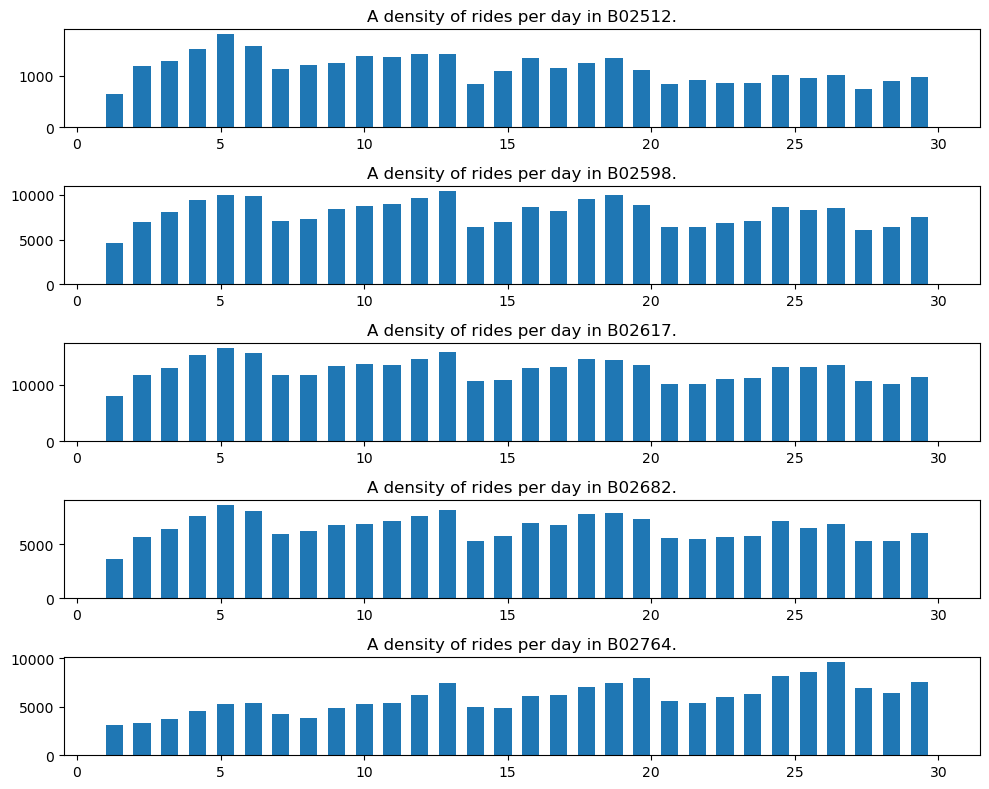

In [14]:
region_counts = Counter(uber_df['Base'])
regions = list(region_counts.keys())
regions_len = len(regions)
fig, axs = plt.subplots(regions_len, figsize=(10, 8))
for index, value in enumerate(regions):
    filtered_df = uber_df.loc[uber_df['Base'] == value]
    axs[index].hist(filtered_df.Day,  width=0.6, bins=30)
    axs[index].set_title("A density of rides per day in %s." % (value))
fig.tight_layout()
plt.show()

#### Subplot And Filter

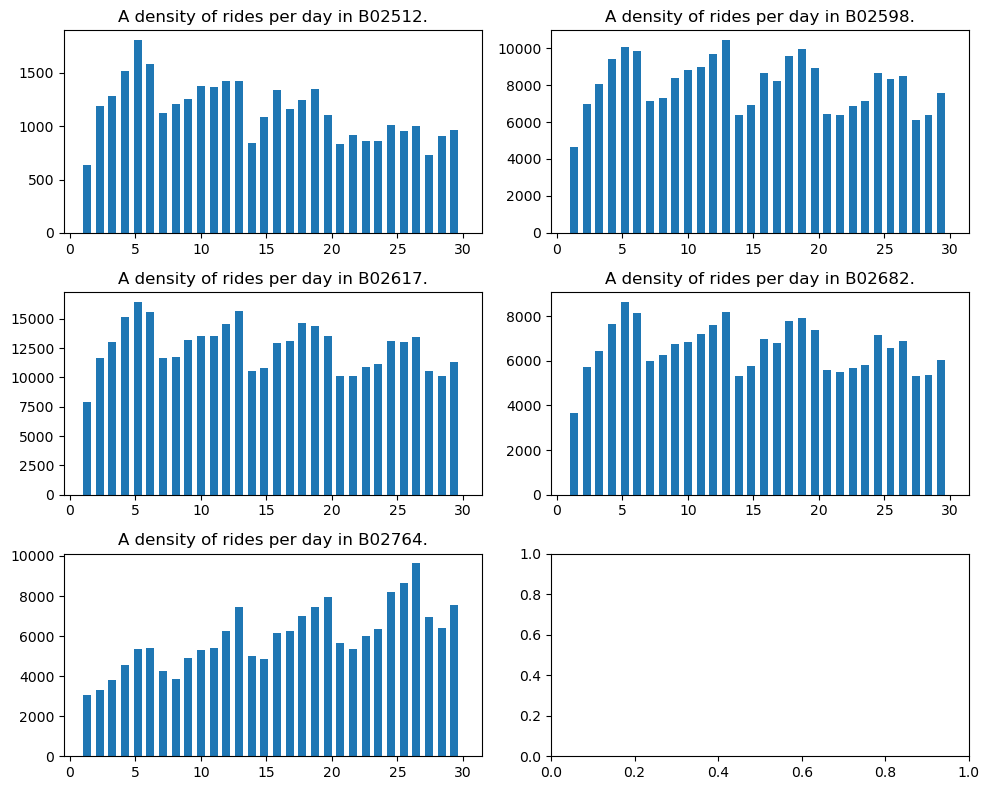

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
value = 'B02512'
filtered_df = uber_df.loc[uber_df['Base']==value]
axs[0, 0].hist(filtered_df.Day,  width=0.6, bins=30)
axs[0, 0].set_title("A density of rides per day in %s." % (value))
value = 'B02598'
filtered_df = uber_df.loc[uber_df['Base']==value]
axs[0, 1].hist(filtered_df.Day,  width=0.6, bins=30)
axs[0, 1].set_title("A density of rides per day in %s." % (value))
value = 'B02617'
filtered_df = uber_df.loc[uber_df['Base']==value]
axs[1, 0].hist(filtered_df.Day,  width=0.6, bins=30)
axs[1, 0].set_title("A density of rides per day in %s." % (value))
value = 'B02682'
filtered_df = uber_df.loc[uber_df['Base']==value]
axs[1, 1].hist(filtered_df.Day,  width=0.6, bins=30)
axs[1, 1].set_title("A density of rides per day in %s." % (value))
value = 'B02764'
filtered_df = uber_df.loc[uber_df['Base']==value]
axs[2, 0].hist(filtered_df.Day,  width=0.6, bins=30)
axs[2, 0].set_title("A density of rides per day in %s." % (value))
fig.tight_layout()
plt.show()

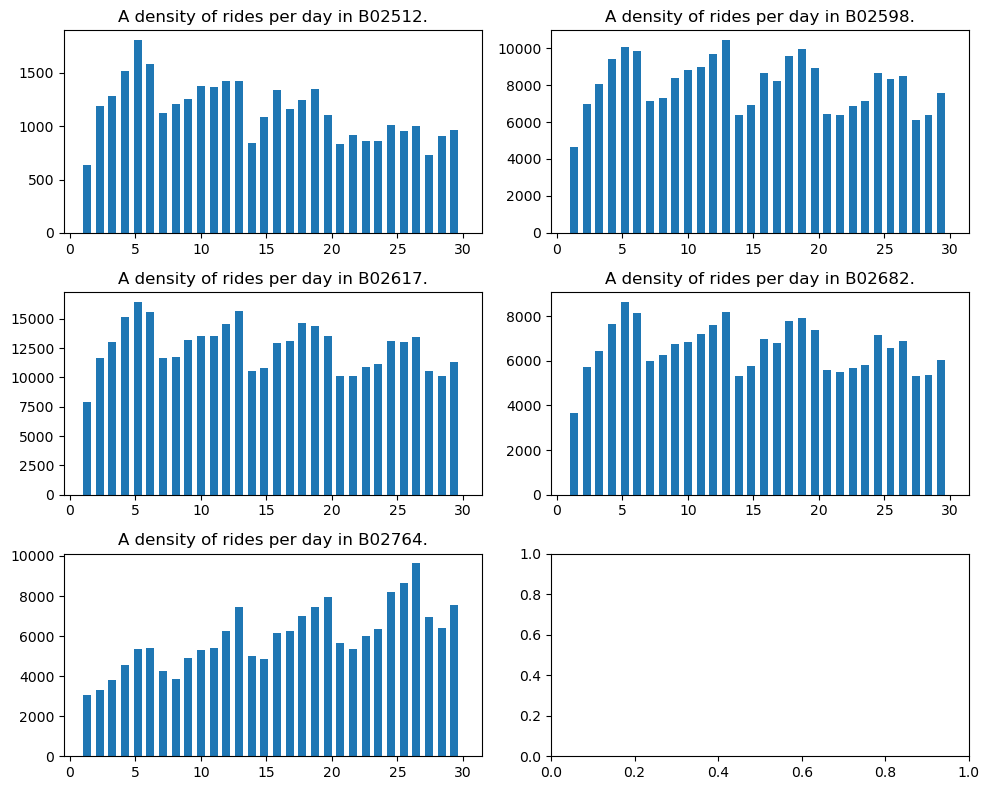

In [13]:
region_counts = Counter(uber_df['Base'])
regions = list(region_counts.keys())
regions_len = len(regions)
fig, axs = plt.subplots(math.ceil(regions_len/2), 2, figsize=(10, 8))
i = 0
j = 0
for value in regions:
    filtered_df = uber_df.loc[uber_df['Base'] == value]
    axs[i, j].hist(filtered_df.Day,  width=0.6, bins=30)
    axs[i, j].set_title("A density of rides per day in %s." % (value))
    j += 1
    if j == 2:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

### HISTOGRAM show the density of the kind of data

#### Now we can check the density of rides according to days, hours, and weekdays

Text(0, 0.5, 'Density of rides')

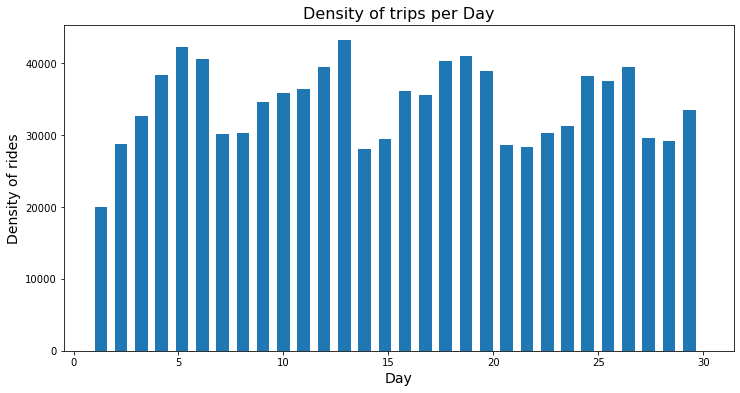

In [9]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

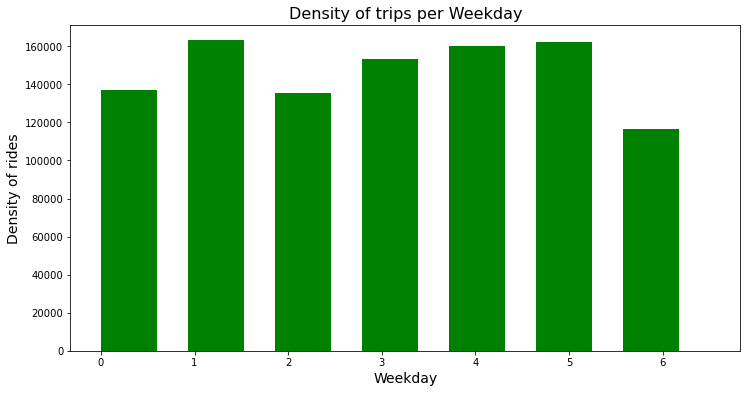

In [34]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

Text(0, 0.5, 'Density of rides')

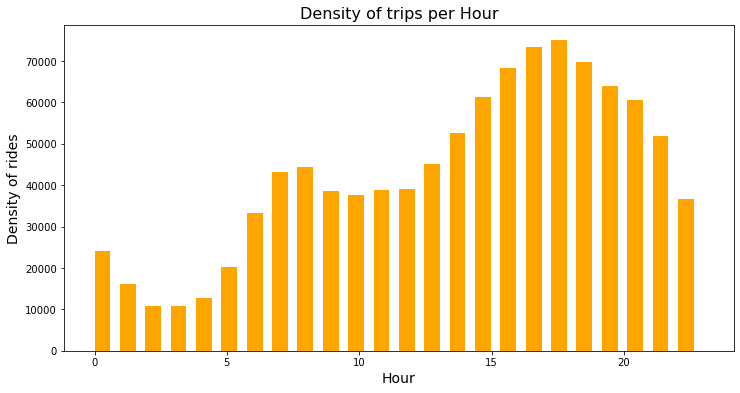

In [24]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize=(12, 6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.